In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from ruamel_yaml.compat import ordereddict

In [2]:
df = pd.read_csv("Data/kitCapstoneJan24_data.csv", sep=";")

## selecting the country that we want

In [3]:
selected_country = 'Country A'
#Get rows with for country A

df_country_a = df[df['countryname'] == selected_country]
df_country_a

,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## building a additional feature for months (1-12)

important for meanbymonth

In [4]:
df_country_a['month_normalized'] = df_country_a['month'] % 12
df_country_a

df_country_a = df_country_a[['month_normalized','month', 'countryname'] + [col for col in df_country_a.columns if col not in ['month_normalized','month', 'countryname']]]

df_country_a

/var/folders/qs/1560hq_j7kl13jy4hgrfjtcc0000gn/T/ipykernel_74548/2443941320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_a['month_normalized'] = df_country_a['month'] % 12


,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,1,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,8,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,10,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,11,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## select an vehiclegroup

In [5]:
selcted_vehiclegroup = 'vehiclegroup01'

# delete all columns that are for a diffe

df1 = df_country_a

# create new dataframe with month and all columns containing vehiclegroup01
df2 = df1.filter(regex=selcted_vehiclegroup)
df2.head()

# drop columns in df1 which contain vehiclegroup
df3 = df1.drop(df1.filter(regex='vehiclegroup').columns, axis=1)
df3.head()

# merge df2 and df3 by index
df4 = df2.merge(df3, left_index=True, right_index=True)
df4.head()

# is there a column month in df4?
df4.columns.str.contains('month').any()
# column month should be the first column, second column is countryname
df4 = df4[['month_normalized','month', 'countryname'] + [col for col in df4.columns if col not in ['month_normalized','month', 'countryname']]]

In [6]:
# drop rows after row 258
test = df4.drop(df4.index[258:])

## build different dataframes for internal and external data

In [7]:
# dataframe with first 18 columns (internal data)
df_internal = test.iloc[:, :21]
df_internal.head()

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,...,leads__vehiclegroup01__won,leads__vehiclegroup01__first_touch_point,leads__vehiclegroup01__lost,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,premises__vehiclegroup01__flag_order_start,premises__vehiclegroup01__in_sales,premises__vehiclegroup01__flag_production_start,premises__vehiclegroup01__in_production,quota__vehiclegroup01__aq
0,1,1,Country A,296.0,352.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,81.0,NaN,NaN,NaN,NaN,NaN
1,2,2,Country A,414.0,372.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,4.0,130.0,NaN,NaN,NaN,NaN,NaN
2,3,3,Country A,405.0,604.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,2.0,145.0,NaN,NaN,NaN,NaN,NaN
3,4,4,Country A,359.0,483.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,2.0,183.0,NaN,NaN,NaN,NaN,NaN
4,5,5,Country A,403.0,474.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,4.0,201.0,NaN,NaN,NaN,NaN,NaN


# dataframe with external features
df_external = test.iloc[:, 21:]
df_external = test['']df_external.
df_external.head()

In [8]:
# dataframe with external features
df_external = test.iloc[:, 21:]
df_external.loc[:, 'month_normalized'] = test['month_normalized']
df_external.head()

,global_consumer__alcoholic_beverages,global_consumer__apparel,global_consumer__apparel_footwear,global_consumer__appliances,global_consumer__automobiles,global_consumer__average_disposable_income_of_urban_households_nominal,global_consumer__average_disposable_income_of_urban_households_real,global_consumer__average_income,global_consumer__beer,global_consumer__building_materials_garden_supply,...,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi,month_normalized
0,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,46.394457,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


# building target values


In [9]:
#take every row from 50 to 255 and 
#X = df_internal.iloc[49:255,:-3]
X = df_internal.iloc[49:255, ~df_internal.columns.str.contains('sales_actuals_monthly__vehiclegroup01__orderintake')]
y = df_internal.iloc[49:255, 3]

X_with_target = df_internal.iloc[49:255,:]


In [10]:
X_with_target

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,...,leads__vehiclegroup01__won,leads__vehiclegroup01__first_touch_point,leads__vehiclegroup01__lost,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,premises__vehiclegroup01__flag_order_start,premises__vehiclegroup01__in_sales,premises__vehiclegroup01__flag_production_start,premises__vehiclegroup01__in_production,quota__vehiclegroup01__aq
49,2,50,Country A,215.0,256.0,NaN,NaN,NaN,NaN,78.0,...,NaN,NaN,NaN,296.0,197.0,0.0,0.0,0.0,0.0,NaN
50,3,51,Country A,250.0,488.0,NaN,NaN,NaN,NaN,79.0,...,NaN,NaN,NaN,376.0,285.0,0.0,0.0,0.0,0.0,NaN
51,4,52,Country A,222.0,552.0,NaN,NaN,NaN,NaN,84.0,...,NaN,NaN,NaN,374.0,346.0,0.0,0.0,200.0,51.0,NaN
52,5,53,Country A,179.0,411.0,NaN,NaN,NaN,NaN,73.0,...,NaN,NaN,NaN,381.0,401.0,0.0,0.0,0.0,51.0,NaN
53,6,54,Country A,209.0,366.0,NaN,NaN,NaN,NaN,143.0,...,NaN,NaN,NaN,313.0,328.0,0.0,0.0,0.0,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,11,251,Country A,323.0,355.0,317.0,331.0,311.0,138.0,564.0,...,615.0,218.0,241.0,590.0,432.0,0.0,417.0,0.0,385.0,326.0
251,0,252,Country A,262.0,579.0,305.0,259.0,214.0,180.0,355.0,...,528.0,184.0,195.0,478.0,299.0,0.0,417.0,0.0,385.0,279.0
252,1,253,Country A,266.0,195.0,179.0,272.0,249.0,181.0,353.0,...,445.0,187.0,213.0,279.0,128.0,0.0,417.0,0.0,385.0,138.0
253,2,254,Country A,531.0,247.0,297.0,326.0,357.0,173.0,371.0,...,757.0,267.0,367.0,319.0,158.0,333.0,472.0,0.0,385.0,238.0


## testing wheel

In [31]:

use_all_features = True
# if false, assign checkup_features here
checkup_features = ['quota__vehiclegroup01__aq'],['sales_flow_monthly__vehiclegroup01__cp8']
input_df = df_external

#methods
mean_per_month = True
median_per_month = True
interpolation_linear = True
interpolation_spline = True
fill_zero = True

if use_all_features:
    checkup_features = input_df.columns
for feature in checkup_features:
    if input_df[feature].isna().any():
        if mean_per_month:
            # add mean per month
            # Fill in missing values using the corresponding month values
            month_means = {}
            for i in range(len(input_df)):
                month = input_df.iloc[i]['month_normalized']
                month_values = input_df.loc[input_df['month_normalized'] == month, feature]
                if not month_values.isnull().values.all():
                    month_means[month] = month_values.mean()

            # Fill in missing values using the corresponding month values
            input_df[feature+'_meanbymonth']=input_df[feature].loc[:].fillna(input_df['month_normalized'].map(month_means))

        if median_per_month:
            # add median per month
            # Fill in missing values using the corresponding month values
            month_medians = {}
            for i in range(len(input_df)):
                month = input_df.iloc[i]['month_normalized']
                month_values = input_df.loc[input_df['month_normalized'] == month, feature]
                if not month_values.isnull().values.all():
                    month_medians[month] = month_values.median(skipna=True)
            
            input_df[feature + '_medianbymonth'] = (input_df[feature].loc[:].
                                                    fillna(input_df['month_normalized']
                                                           .map(month_medians)))

        if interpolation_linear:
            input_df[feature+'_interpolated_linear']=input_df[feature].interpolate(method='linear', limit_direction = 'both')

        if interpolation_spline:
            input_df[feature + '_interpolation_spline'] = input_df[feature].interpolate(method='spline', limit_direction = 'backward', order=3)
    
        if fill_zero:
            input_df[feature+'_fill_zero']=input_df[feature].fillna(0)

        input_df.drop(columns=feature, inplace=True)
       
output_df = input_df

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [32]:
output_df.head(15)

,global_consumer__alcoholic_beverages,global_consumer__apparel,global_consumer__apparel_footwear,global_consumer__appliances,global_consumer__automobiles,global_consumer__average_disposable_income_of_urban_households_nominal,global_consumer__average_disposable_income_of_urban_households_real,global_consumer__average_income,global_consumer__beer,global_consumer__building_materials_garden_supply,...,registrations__buildtype_coupe_meanbymonth,registrations__buildtype_coupe_medianbymonth,registrations__buildtype_coupe_interpolated_linear,registrations__buildtype_coupe_interpolation_spline,registrations__buildtype_coupe_fill_zero,registrations__buildtype_kombi_meanbymonth,registrations__buildtype_kombi_medianbymonth,registrations__buildtype_kombi_interpolated_linear,registrations__buildtype_kombi_interpolation_spline,registrations__buildtype_kombi_fill_zero
0,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,46.394457,34.695874,0,...,1646.5,1646.5,1913.0,3.814189e+09,0.0,39726.5,39726.5,48321.0,4.590411e+10,0.0
1,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,1681.5,1681.5,1913.0,3.766901e+09,0.0,40390.5,40390.5,48321.0,4.533422e+10,0.0
2,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,2210.5,2210.5,1913.0,3.720005e+09,0.0,42680.5,42680.5,48321.0,4.476907e+10,0.0
3,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,1496.0,1496.0,1913.0,3.673499e+09,0.0,28910.5,28910.5,48321.0,4.420863e+10,0.0
4,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,1739.0,1739.0,1913.0,3.627383e+09,0.0,32115.0,32115.0,48321.0,4.365290e+10,0.0
5,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,2119.0,2119.0,1913.0,3.581655e+09,0.0,38631.5,38631.5,48321.0,4.310183e+10,0.0
6,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,3177.0,3177.0,1913.0,3.536312e+09,0.0,52735.0,52735.0,48321.0,4.255543e+10,0.0
7,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,2300.0,2300.0,1913.0,3.491354e+09,0.0,38905.0,38905.0,48321.0,4.201366e+10,0.0
8,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,2307.0,2307.0,1913.0,3.446778e+09,0.0,41362.0,41362.0,48321.0,4.147651e+10,0.0
9,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,122.084727,34.695874,0,...,2299.0,2299.0,1913.0,3.402584e+09,0.0,44854.0,44854.0,48321.0,4.094396e+10,0.0


In [33]:
output_df.isna().sum()


global_consumer__alcoholic_beverages                   0
global_consumer__apparel                               0
global_consumer__apparel_footwear                      0
global_consumer__appliances                            0
global_consumer__automobiles                           0
                                                      ..
registrations__buildtype_kombi_meanbymonth             0
registrations__buildtype_kombi_medianbymonth           0
registrations__buildtype_kombi_interpolated_linear     0
registrations__buildtype_kombi_interpolation_spline    0
registrations__buildtype_kombi_fill_zero               0
Length: 1708, dtype: int64

## SHAP

In [34]:
import xgboost
import shap
from sklearn import metrics
import matplotlib
shap.initjs()

In [35]:
X= output_df

# Replace countrynames with numbers 1 to 4
if 'countryname' in X.columns:
    countryMapping = {'Country A': 1, 'Country B': 2, 'Country C': 3, 'Country D': 4}
    X['countryNo'] = X['countryname'].map(countryMapping)
    X = X.drop('countryname', axis=1)

print(X.dtypes)


y= df_internal.iloc[:, 3]
y.head()

global_consumer__alcoholic_beverages                   float64
global_consumer__apparel                               float64
global_consumer__apparel_footwear                      float64
global_consumer__appliances                            float64
global_consumer__automobiles                           float64
                                                        ...   
registrations__buildtype_kombi_meanbymonth             float64
registrations__buildtype_kombi_medianbymonth           float64
registrations__buildtype_kombi_interpolated_linear     float64
registrations__buildtype_kombi_interpolation_spline    float64
registrations__buildtype_kombi_fill_zero               float64
Length: 1708, dtype: object


0    296.0
1    414.0
2    405.0
3    359.0
4    403.0
Name: sales_actuals_monthly__vehiclegroup01__orderintake, dtype: float64

In [55]:
model = xgboost.XGBRegressor().fit(X, y)

print('Accuracy Score of the Model is: ', model.score(X, y))

explainer = shap.Explainer(model)
shap_values = explainer(X)
shap_values.base_values[0]


Accuracy Score of the Model is:  0.999999978138381


296.32578

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


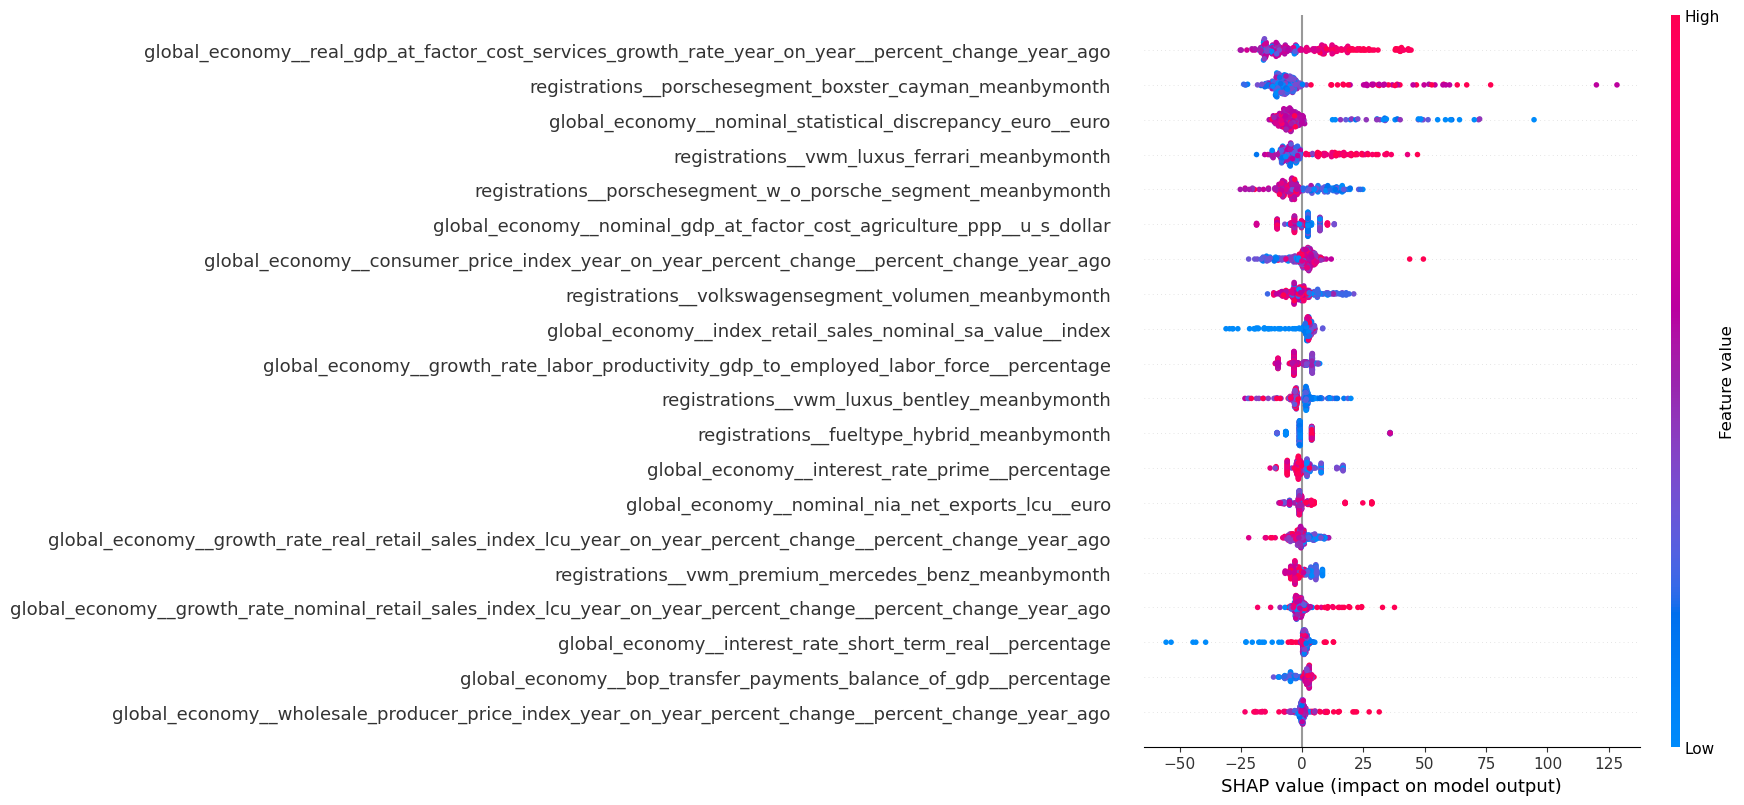

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


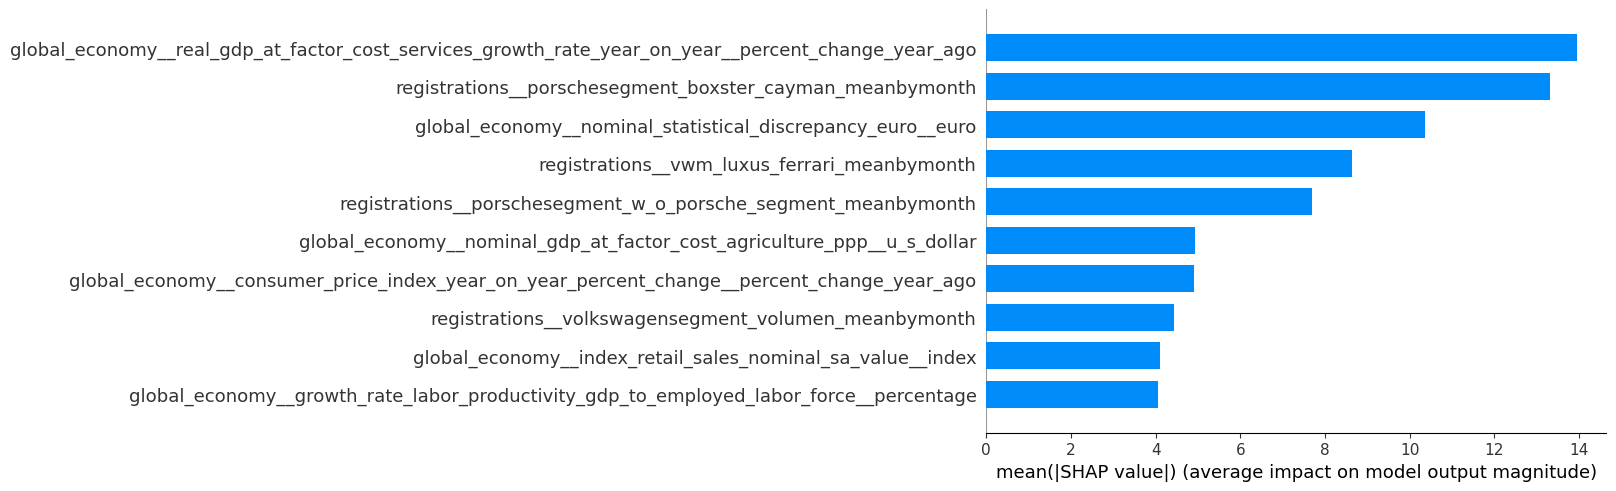

In [37]:
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type='bar', max_display=10)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


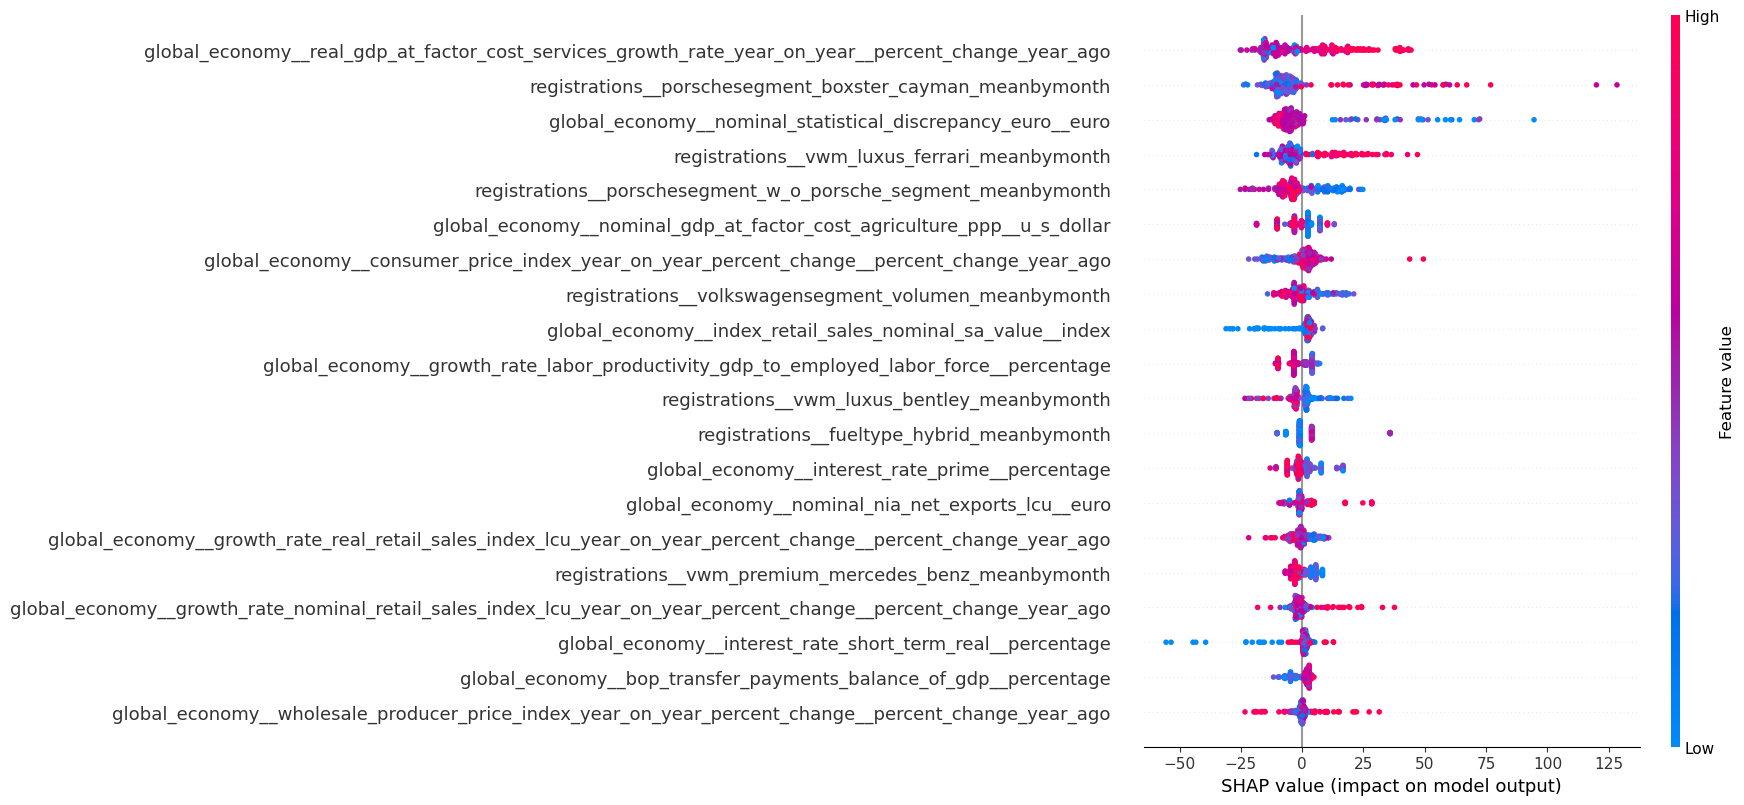

AttributeError: 'NoneType' object has no attribute 'data'

In [38]:
summaryPlot_data = shap.summary_plot(shap_values, X)

feature_names = summaryPlot_data.data[0]
importance_values = summaryPlot_data.data[1]

# Get the top feature

top_feature_index = importance_values.idxmax()
top_feature_name = feature_names[top_feature_index]

In [45]:
shap_values

.values =
array([[-5.6177080e-01, -5.0733298e-02, -8.0521824e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-3.0534771e-01, -3.7661664e-02, -7.9379283e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.3054539e+00, -2.8169471e-01, -7.9379283e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 1.0320885e-01,  1.7193088e-01, -2.4868289e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-8.5621633e-02,  9.6269734e-02, -2.4868289e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-9.5459923e-02,  1.9493324e-01, -3.4770637e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

.base_values =
array([296.32578, 296.32578, 296.32578, 296.32578, 296.32578, 296.32578,
       296.32578, 296.32578, 296.32578, 296.32578, 296.32578, 296.32578,
       296.32578, 296.32578, 296.32578, 296.32578, 296.32578, 296.32578,
       296.32578, 2

In [47]:
X.columns

Index(['global_consumer__alcoholic_beverages', 'global_consumer__apparel',
       'global_consumer__apparel_footwear', 'global_consumer__appliances',
       'global_consumer__automobiles',
       'global_consumer__average_disposable_income_of_urban_households_nominal',
       'global_consumer__average_disposable_income_of_urban_households_real',
       'global_consumer__average_income', 'global_consumer__beer',
       'global_consumer__building_materials_garden_supply',
       ...
       'registrations__buildtype_coupe_meanbymonth',
       'registrations__buildtype_coupe_medianbymonth',
       'registrations__buildtype_coupe_interpolated_linear',
       'registrations__buildtype_coupe_interpolation_spline',
       'registrations__buildtype_coupe_fill_zero',
       'registrations__buildtype_kombi_meanbymonth',
       'registrations__buildtype_kombi_medianbymonth',
       'registrations__buildtype_kombi_interpolated_linear',
       'registrations__buildtype_kombi_interpolation_spline',
 

In [59]:
excel_file_path = "shap_values_output.csv"
shap_df = pd.DataFrame(shap_values.values[:], columns=X.columns)

shap_df.to_csv(excel_file_path, index=False)

print(f"SHAP values exported to {excel_file_path}")

SHAP values exported to shap_values_output.csv


In [50]:
# Excel output top 25
# Influence on final value